Welcome to the Session! 🎉

Good Morning Everyone !!!

Hello everyone, and welcome to today's session on HR Analytics with Statistics! 📊✨

I hope you are all excited and ready to dive into today's agenda. If you have any doubts or questions, please feel free to ask—don’t hesitate! 💡😊

Let's have an engaging and insightful session together! 🚀

z-test  --> n>30,population std is known----
compare sample mean to a population mean

t-test---n< 30, population std is unknown
-one sample,independent two sample,paired t test

f-test---compare two population variance, normally distributed

anova---compare means of three or more groups

chi square test----categorical data
observed vs expected frequency

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/people.csv")

In [ ]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


#preprocessing
null,duplicate,outliers
#eda

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
satisfactoryLevel,0
lastEvaluation,0
numberOfProjects,0
avgMonthlyHours,0
timeSpent.company,0
workAccident,0
left,0
promotionInLast5years,0
dept,0
salary,0


In [ ]:
df.duplicated().sum()

np.int64(3008)

In [ ]:
df = df.drop_duplicates(keep = 'first') #df[df.duplicated()]

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.to_csv("cleandf",index = False)

In [ ]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [ ]:
plt.style.use('dark_background')

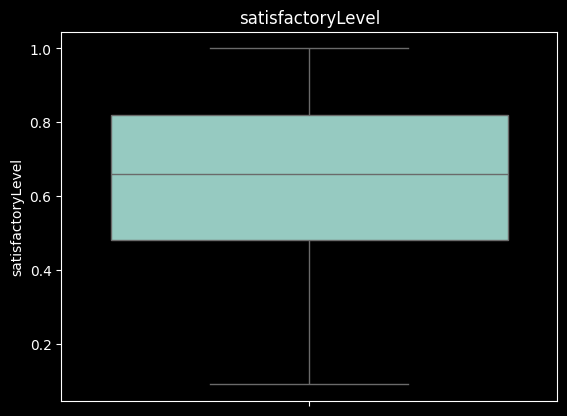

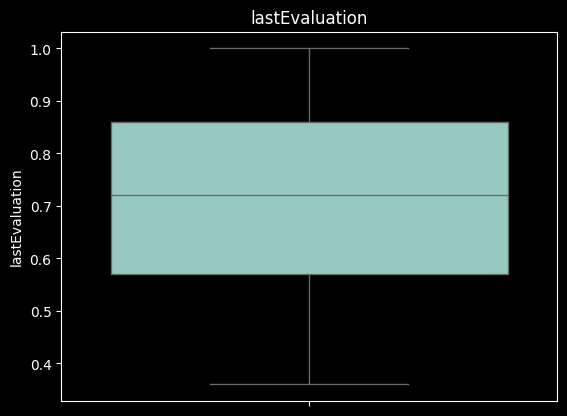

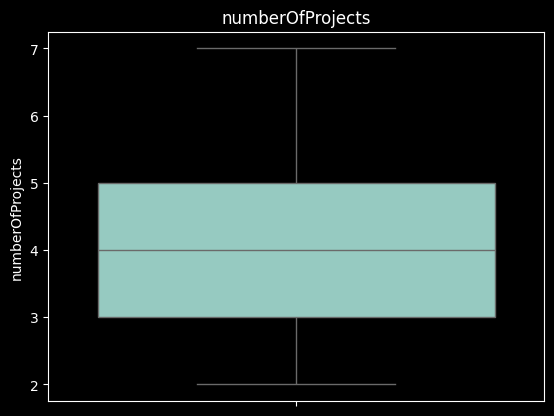

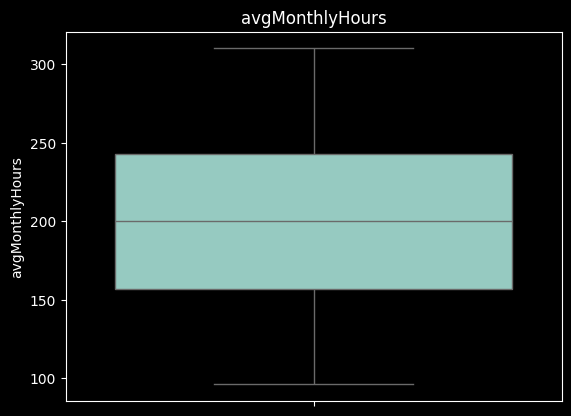

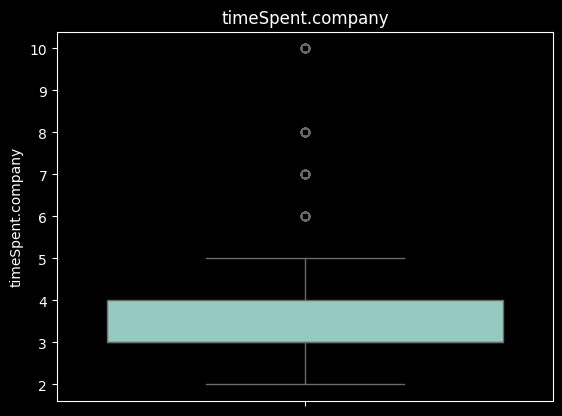

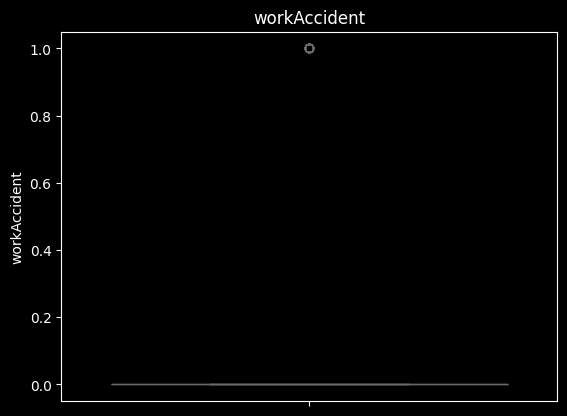

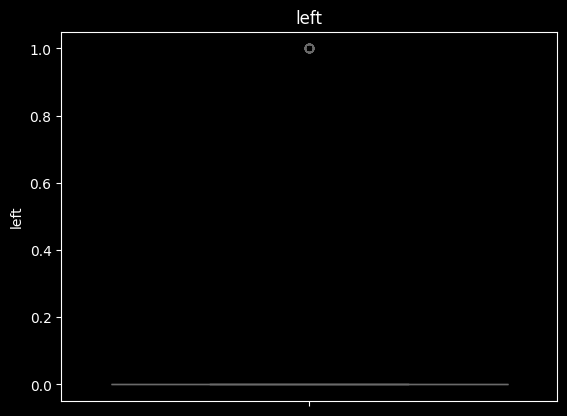

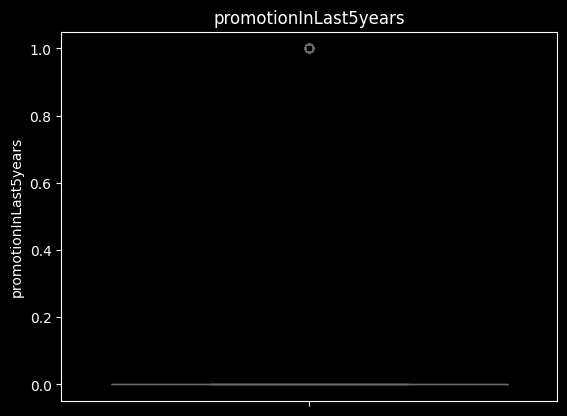

In [ ]:
#outliers are there or not???

for i in df.columns:
  if df[i].dtype != 'object':
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [ ]:
#correlation
x =df.corr(numeric_only= True)

<Axes: >

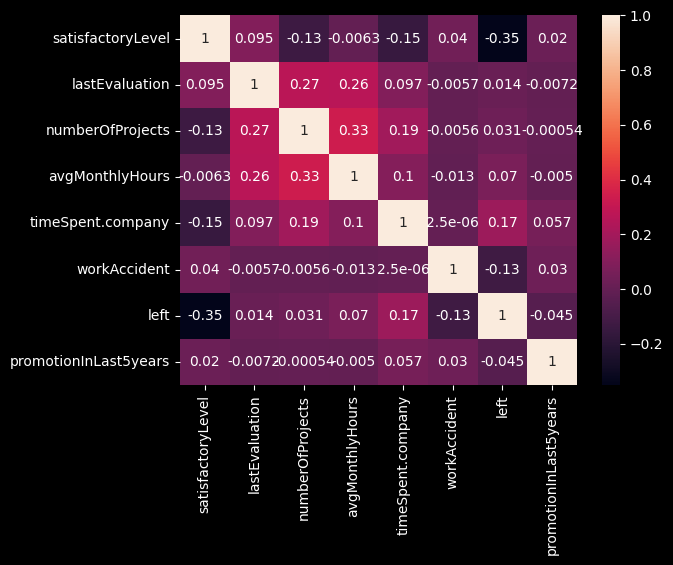

In [ ]:
sns.heatmap(x,annot = True)

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i]=le.fit_transform(df[i])
    print(f"column:{i}")
    print('original---> Encoder')
    for original_class,encoded_value in zip(le.classes_,le.transform(le.classes_)):
      print(f"{original_class}--->{encoded_value}")
    print()


column:dept
original---> Encoder
IT--->0
RandD--->1
accounting--->2
hr--->3
management--->4
marketing--->5
product_mng--->6
sales--->7
support--->8
technical--->9

column:salary
original---> Encoder
high--->0
low--->1
medium--->2



<ipython-input-17-da6ef67d7137>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=le.fit_transform(df[i])
<ipython-input-17-da6ef67d7137>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=le.fit_transform(df[i])


#statistical

check using test that satisfactory level col is normally distributed or not

(array([ 880.,  429.,  386., 1095., 1242., 1540., 1535., 1718., 1621.,
        1545.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <BarContainer object of 10 artists>)

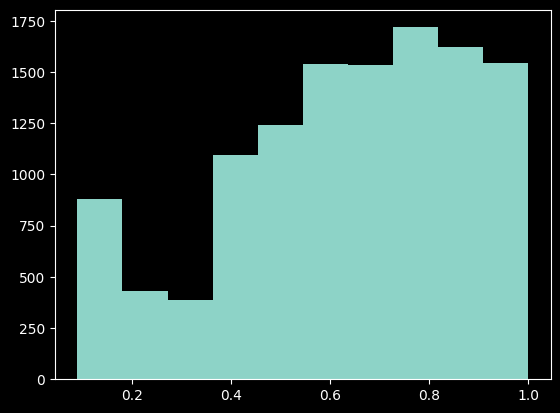

In [ ]:
#visu
plt.hist(df['satisfactoryLevel'])

<Axes: xlabel='lastEvaluation', ylabel='Density'>

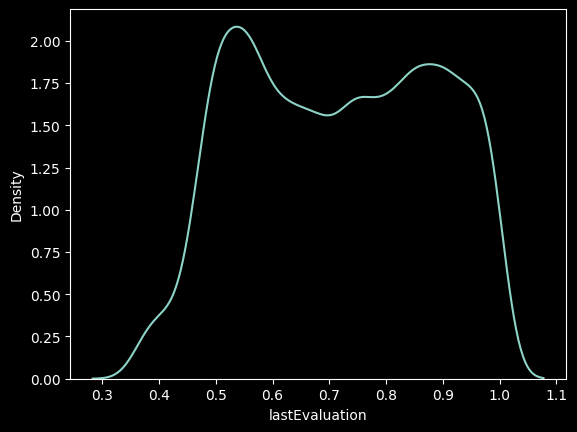

In [ ]:
sns.kdeplot(x='lastEvaluation',data=df)

<Axes: xlabel='satisfactoryLevel', ylabel='Density'>

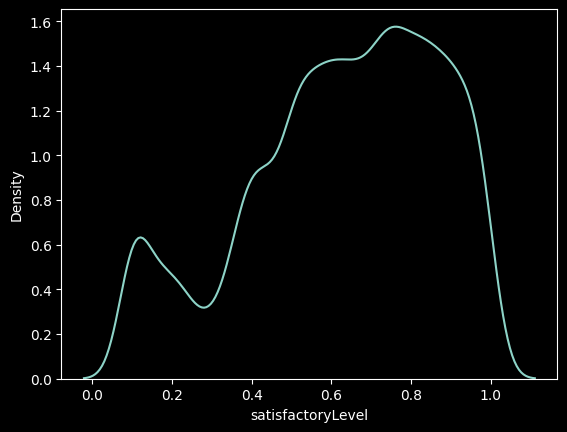

In [ ]:
#kde
sns.kdeplot(x='satisfactoryLevel',data=df)

<ipython-input-22-7405b46a4134>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['satisfactoryLevel'])


<Axes: xlabel='satisfactoryLevel', ylabel='Density'>

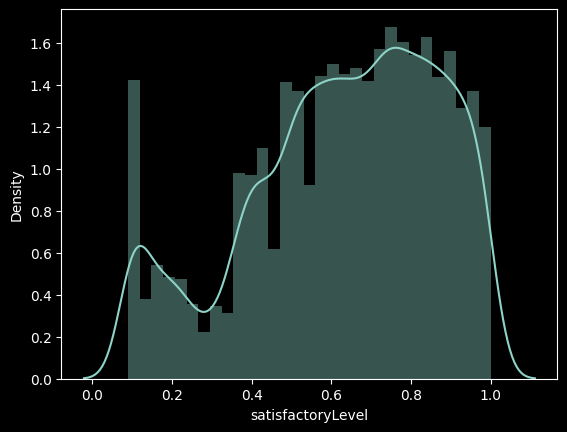

In [ ]:
#distplot

sns.distplot(df['satisfactoryLevel'])

#shapiro -wilk test

In [ ]:
from scipy.stats import shapiro

null: the data is nornmally distributed

alt: the data is not normally distributed

In [ ]:
stats,p_value = shapiro(df['satisfactoryLevel'])

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11991.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
stats

np.float64(0.9526718376165387)

In [ ]:
p_value

np.float64(6.698511499093979e-52)

In [ ]:
if p_value > 0.03:
  print("accept null hypo")
else:
  print("fail to accept the null hypo")

fail to accept the null hypo


In [ ]:
stats,p_value = shapiro(df['lastEvaluation'])

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11991.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
p_value

np.float64(1.0492425782097398e-49)